# What is Sage?

[SageMath](https://www.sagemath.org/) is a free open-source mathematics software system licensed under the GPL.
You can think of Sage as Python extended with a large mathematical library (some written for Sage, and other parts sitting on top of other open-source mathematical software, such as numpy, GAP, and R).

Sage was originally called "Sage", but changed to "SageMath" to avoid ambiguity with other projects named "Sage" and to make google searches easier.

Sage's mission is *Creating a viable free open source alternative to Magma, Maple, Mathematica and Matlab.*

William Stein created Sage and released the first public version in 2005.

I started using Sage in 2007.

# How to run Sage?

+ Install on your own computer.  This is easy for Unix-like systems, such as Linux or MacOS.  Not so easy on Windows: usually requires Windows Subsystem for Linux, or running a virtual machine.
+ Online at [CoCalc](https://cocalc.com/).  CoCalc was launched by William Stein in 2013 as a way to make it easy for people to use Sage online.  CoCalc also provides collaborative LaTeX editing and access to a full Ubuntu virtual machine.
+ [Sage Cell Server](https://sagecell.sagemath.org/) is convenient for quickly running short code.

# Why use Sage instead of plain Python?

+ The main advantage is the huge mathematical library.
+ But since Sage is also Python, you can also use your favorite Python libraries.

# Some differences between Python and Sage

### Python's built-in `int` and `float` types are replaced with Sage's `Integer` and `Real` types.

In [1]:
a=1
print(type(a))

<class 'sage.rings.integer.Integer'>


In [3]:
b=a/2  # integer division returns a rational
print(b,type(b))

1/2 <class 'sage.rings.rational.Rational'>


In [8]:
p=N(pi,100)  # evaluate pi to 100 bits
print(p,type(p))

3.1415926535897932384626433833 <class 'sage.rings.real_mpfr.RealNumber'>


### Sage's preprocessor

`^` is exponentiation instead of bitwise XOR.

In [14]:
2^3  # exponentiation in Sage; bitwise XOR in Python

8

In [15]:
2^^3  # bitwise XOR in Sage

1

ellipsis `..` gives an inclusive range.  Python's `range` gives a half-closed, half-open interval.

In [18]:
[1..7]

[1, 2, 3, 4, 5, 6, 7]

In [20]:
[1,3,..,7]  # can also go by steps, as determined by the first two entries

[1, 3, 5, 7]

In [21]:
sum(i^2 for i in [1..10])  # sum of the squares of the first 10 positive integers.

385

# Example 1: Lights Out

[Lights Out](https://en.wikipedia.org/wiki/Lights_Out_(game)) is an electronic game released by Tiger Electronics in 1995.

As in NumPy, entries of Matrices are indexed starting at 0:
$$
M=
\begin{bmatrix}
M[0,0] & M[0,1] & \ldots & M[0,n-1] \\
M[1,0] & M[1,1] & \ldots & M[1,n-1] \\
\vdots & \vdots & \ddots & \vdots  \\
M[m-1,0] & M[m-1,1] & \ldots & M[m-1,n-1]
\end{bmatrix}.
$$

The Lights Out board is $5\times 5$, which we can represent as a matrix.

In [40]:
target=Matrix(
    GF(2),  # the field is the finite field ("Galois field") of two elements
    5,5,  # 5x5 matrix
    0)  # initialize with 0s
target[0,0]=target[0,4]=target[4,0]=target[4,4]=1
print(target)

[1 0 0 0 1]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
[1 0 0 0 1]


In [28]:
import itertools

In [42]:
# we need to create the basis elements for pressing each button
button_to_press=[]  # keep track of the button corresponding to each basis element
basis_matrices=[]
B=Matrix(GF(2),25,25,0)  # each column will be a basis vector
for k,(i,j) in enumerate(itertools.product(range(5),repeat=2)):
    button_to_press.append((i,j))
    A=Matrix(GF(2),5,5,0)
    A[i,j]=1
    if i>0: A[i-1,j]=1
    if i<4: A[i+1,j]=1
    if j>0: A[i,j-1]=1
    if j<4: A[i,j+1]=1
    basis_matrices.append(A)
    #print(i,j)
    #print(A)
    B[:,k]=Matrix(GF(2),25,1,A.list())
print(B) 

[1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0]
[0 0 0 0 0 0

In [43]:
# solve Bx=target
x=B.solve_right(Matrix(GF(2),25,1,target.list()))
x

25 x 1 dense matrix over Finite Field of size 2 (use the '.str()' method to see the entries)

In [60]:
buttons_to_solve=[]
for k in range(25):
    if x[k,0]==1:  # note that x is a Matrix
        buttons_to_solve.append(button_to_press[k])
print(buttons_to_solve)
Solution=Matrix(GF(2),5,5,0)
for (i,j) in buttons_to_solve:
    Solution[i,j]=1
print(Solution)

[(1, 0), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 4)]
[0 0 0 0 0]
[1 0 0 0 1]
[1 1 0 1 1]
[1 0 0 0 1]
[0 0 0 0 0]


# Example 2: Formulas for sums of powers of integers

We know that $$ 1 + 2 + 3 + \ldots + n = \frac{n(n+1)}{2}=\frac{1}{2}n^2 + \frac{1}{2}n.$$
and $$ 1^2 + 2^2 + 3^2 + \ldots + n^2 = \frac{n(n+1)(2n+1)}{6}=\frac{1}{3}n^3 + \frac{1}{2}n^2 + \frac{1}{6}n.$$
What about the sum of the $k$th power of the first $n$ positive integers?
By some "abstract nonsense", the answer should be a polynomial of degree at most $k+1$.
Let's find the coefficients.

In [84]:
k=2

In [85]:
R.<x>=PolynomialRing(QQ)  # univariate polynomial ring with rational coefficients and variable x

In [86]:
data=[(n,sum(i^k for i in [1..n])) for n in range(0,k+2)]
data

[(0, 0), (1, 1), (2, 5), (3, 14)]

In [87]:
R.lagrange_polynomial(data)

1/3*x^3 + 1/2*x^2 + 1/6*x

# Example 3: Uniquely $K_r$-saturated graphs

Sage has a [lot](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generic_graph.html) of graph theory capabilities.

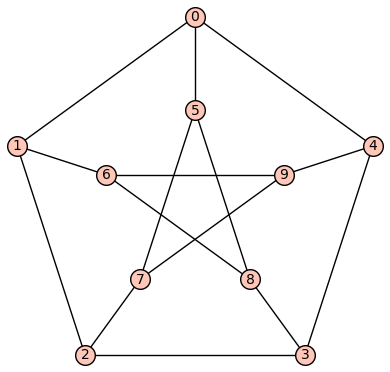

In [1]:
G=graphs.PetersenGraph()
G.show()

In [2]:
G.chromatic_number()

3

In [5]:
G.coloring()

[[0, 2, 6], [1, 3, 5, 9], [4, 7, 8]]

In [7]:
hex_colors=G.coloring(hex_colors=True)
hex_colors

{'#ff0000': [0, 2, 6], '#00ff00': [1, 3, 5, 9], '#0000ff': [4, 7, 8]}

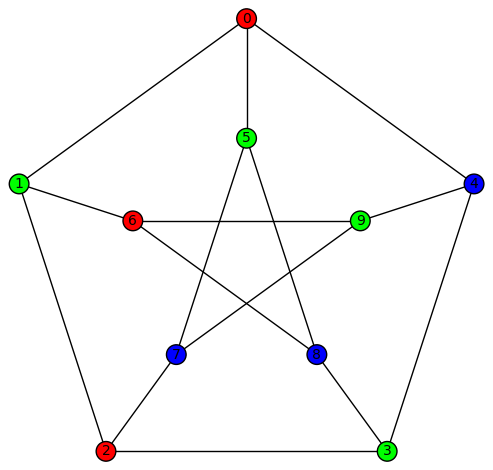

In [8]:
p=G.plot(vertex_colors=hex_colors)
p.show()

We can generate *all* proper $n$-vertex graph colorings.

In [11]:
from sage.graphs.graph_coloring import all_graph_colorings
count=0
for C in all_graph_colorings(G,G.chromatic_number()):
    count+=1
print(f"There are {count} colorings.")

There are 120 colorings.


Sage can generate graphs and check properties.

What is the smallest graph with trivial automorphism group?

Testing graphs with 2 vertices.
Testing graphs with 3 vertices.
Testing graphs with 4 vertices.
Testing graphs with 5 vertices.
Testing graphs with 6 vertices.
Found! ECro


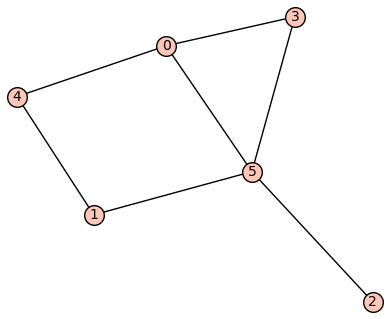

In [23]:
for n in range(2,10):
    print(f"Testing graphs with {n} vertices.")
    break_loop=False
    for G in graphs(n):  # generates all simple undirected n-vertex graphs, up to symmetry
        if G.automorphism_group().order()==1:
            print(f"Found! {G.graph6_string()}")
            G.show()
            break_loop=True
            break
    if break_loop:
        break

The *square $G^2$* of a graph $G$ has the same vertex set as $G$, and two vertices $u$ and $v$ are adjacent in $G^2$ if the distance between them in $G$ is at most $2$.

What is the largest subcubic planar graph $G$ such that $G^2$ is complete?

A graph $G$ is said to be *uniquely $K_r$-saturated* if $G$ contains (as a subgraph) no copy of $K_r$, and adding any missing edge to $G$ produces *exactly one* copy of $K_r$.

What is the smallest uniquely $K_3$-saturated graph?  Are there others on at most 10 vertices?

In [56]:
from sage.graphs.independent_sets import IndependentSets

def is_uniquely_Kr_saturated(G,r):
    if not G.is_connected():
        return False  # G must be connected
    
    for u,v in itertools.combinations(G.vertices(sort=False),2):
        if G.has_edge(u,v):
            continue
            
        common_neighbors=[w for w in G.vertices(sort=False) if (G.has_edge(u,w) and G.has_edge(v,w))]
        H=G.subgraph(vertices=common_neighbors)
        if (omega:=H.clique_number())!=r-2:
            return False  # this missing edge will not make a K_r.
        
        # check that H only has one clique of size omega
        clique_found=False
        for I in IndependentSets(H,complement=True):
            if len(I)==omega:
                if clique_found:  # we have already found a clique of the desired size
                    return False
                clique_found=True
    
    return True  # all missing edges are okay

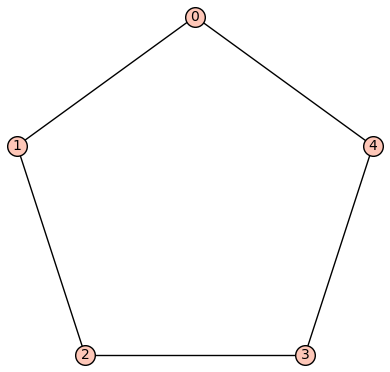

True


In [57]:
G=graphs.CycleGraph(5)
G.show()
print(is_uniquely_Kr_saturated(G,3))

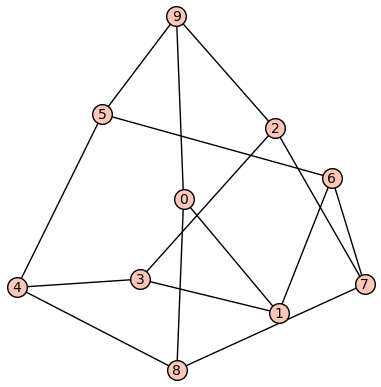

In [60]:
n=10
for G in graphs(n,property=lambda H: max(H.degree_sequence())<n-1 and H.clique_number()<3):
    if is_uniquely_Kr_saturated(G,3):
        G.show()